In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [51]:
def f(x):
    return x**4 - x**3 -12*x**2 + 15*x + 5

def getSolutionSet(initial_sol, x, y, lr, epochs):
    y_der = (y[1:]-y[:-1])/(x[1]-x[0])
    solution_set =[initial_sol]
    curr_sol = initial_sol
    for i in range(epochs):
        cur_sol_ind = np.abs(x-curr_sol).argmin()
        curr_sol = curr_sol - lr*y_der[cur_sol_ind]
        solution_set.append(curr_sol)
    solution_set = np.array(solution_set)

    return solution_set

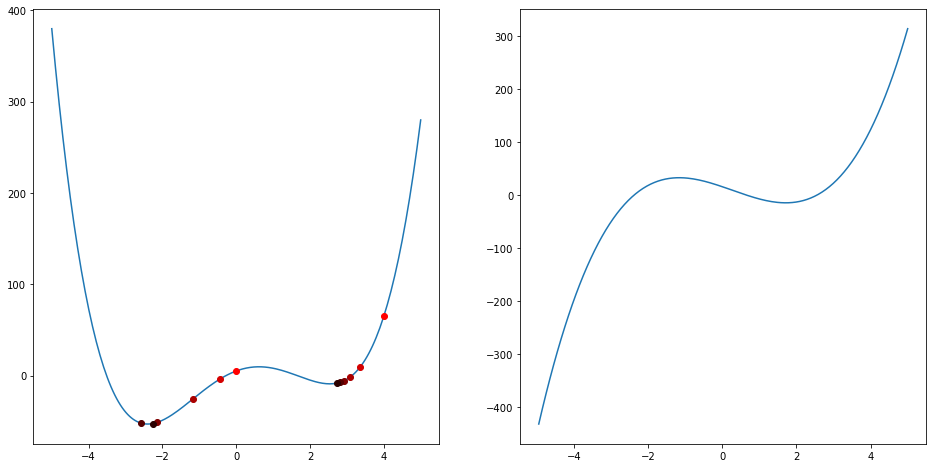

In [56]:
x = np.linspace(-5, 5, 200)
y = f(x)
y_der = (y[1:]-y[:-1])/(x[1]-x[0])
lr = 5e-3
epochs = 5

solution_set_1 = getSolutionSet(4, x, y, 5e-3, epochs)
solution_set_2 = getSolutionSet(0, x, y, 3e-2, epochs)

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(x, y)
ax[1].plot(x[1:],y_der)

color_gap = 255/len(solution_set_1)
for i, pt in enumerate(solution_set_1):
    red_int = int(255-i*color_gap)
    color = "#"+hex(red_int)[2:].rjust(2,'0')+"0000"
    ax[0].plot(solution_set_1[i], f(solution_set_1[i]), 'o', color=color)

color_gap = 255/len(solution_set_2)
for i, pt in enumerate(solution_set_2):
    red_int = int(255-i*color_gap)
    color = "#"+hex(red_int)[2:].rjust(2,'0')+"0000"
    ax[0].plot(solution_set_2[i], f(solution_set_2[i]), 'o', color=color)

plt.show()